<h1>Early Blight Tomato Disease from RGB To HSV </h1>

In [2]:
#importing libraries
import matplotlib.pyplot as plt
import cv2
import numpy as np


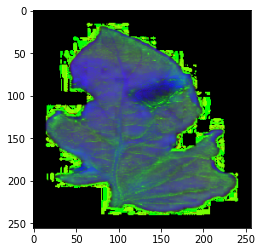

In [63]:
#image 1 conversion
eb1=cv2.cvtColor(cv2.imread('EB1.jpg'),cv2.COLOR_BGR2RGB)

eb1Dup=eb1.reshape(256*256,3)

for index,pixel in enumerate(eb1Dup):
    (r,g,b)=[int(x)/255 for x in pixel]
    
    #calculating cmax and cmin
    cmax=max(r,g,b)
    cmin=min(r,g,b)
    diff=cmax-cmin
    
    #calculating hue
    if cmax==cmin:
        h=0
    elif cmax==r:
        h=(60*((g-b)/diff)+360)%360
    elif cmax==g:
        h=(60*((b-r)/diff)+120)%360
    elif cmax==b:
        h=(60*((r-g)/diff)+240)%360
    h/=2
    
    #calculating saturation
    if cmax==0:
        s=0
    else:
        s=(diff/cmax)*255
    #calculating value /brightness
    v=cmax*255
    
    eb1Dup[index]=[np.uint8(h),np.uint8(s),np.uint8(v)]

eb1Dup=eb1Dup.reshape(256,256,3)
plt.imshow(eb1Dup)
    
    

<h2>Comparing our result with inbuild function</h2>

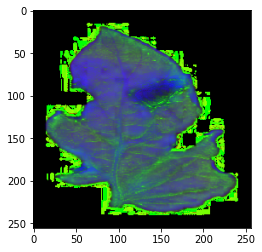

In [49]:

eb2=cv2.imread('EB1.jpg')
eb2c=cv2.cvtColor(cv2.cvtColor(eb2,cv2.COLOR_BGR2RGB),cv2.COLOR_RGB2HSV)
plt.imshow(eb2c)
